In [1]:
import pandas as pd

def preprocessing(csv_file_path):
    data = pd.read_csv(csv_file_path)
    data.columns = ["EC_number", "Species", "smiles", "Compound_name", "Amino_encoding", "Kcat", "unit"]
    data = pd.DataFrame(data)
    return data

data = preprocessing("C:\\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\kcat_transferase.csv")
onehot_encoded_smiles = pd.read_csv("C:\\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\encoded_amino.csv")

In [2]:
from sklearn.decomposition import PCA


amino_pca = PCA(n_components=433) # 433 was the optimal number of components for 95% confidence.
principal_components = amino_pca.fit_transform(onehot_encoded_smiles)

# Convert to DataFrame for convenience
amino_pca_df = pd.DataFrame(data=principal_components)

In [3]:
import numpy as np

X = amino_pca_df
y = np.log10(data["Kcat"])


In [4]:
data.head()

,EC_number,Species,smiles,Compound_name,Amino_encoding,Kcat,unit
0,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDFLEKYYKFGSRHSAESQILKHLLKNLF...,0.0410,s^(-1)
1,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...,1.0200,s^(-1)
2,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...,0.0830,s^(-1)
3,2.1.1.10,Brassica oleracea,C(CS)C(C(=O)O)N,L-Homocysteine,MGLEKKSALLEDLIEKCGGCAVVDGGFATQLEIHGAAINDPLWSAV...,0.0375,s^(-1)
4,2.1.1.10,Escherichia coli,C(CS)C(C(=O)O)N,L-Homocysteine,MSQNNPLRALLDKQDILLLDGAMATELEARGCNLADSLWSAKVLVE...,0.3800,s^(-1)


In [6]:
amino_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,423,424,425,426,427,428,429,430,431,432
0,-6.260814,3.233607,-0.939699,-0.671007,-1.072594,-0.166186,0.093936,0.350908,0.706539,0.184849,...,0.675759,-0.384864,-0.478517,0.592967,-0.011004,0.822918,-0.117441,-0.252493,0.509317,0.594818
1,-6.252592,3.232955,-0.952134,-0.687594,-1.056070,-0.151328,0.075121,0.344627,0.717727,0.185152,...,0.678922,-0.385339,-0.470210,0.586073,-0.019409,0.807419,-0.110774,-0.246753,0.506953,0.598339
2,-6.247061,3.218509,-0.943114,-0.686935,-1.059343,-0.115982,0.097260,0.372542,0.735333,0.197906,...,0.723980,-0.421947,-0.405839,0.570318,-0.026825,0.864693,-0.102914,-0.261651,0.478467,0.624489
3,-3.800123,-0.259436,0.613383,0.559863,0.904566,0.694478,-2.001746,1.991927,1.078039,0.257786,...,-0.192293,1.081159,-0.079657,-0.297977,0.378425,0.796269,0.294309,0.892339,0.533699,0.824087
4,-4.529573,0.860604,0.132385,0.345013,0.960916,0.297965,-1.657127,1.547796,1.209693,0.185218,...,-0.743951,1.390873,-3.693931,0.290927,1.495743,1.302800,0.657224,-1.210432,-0.166046,0.371982


In [5]:
from sklearn.model_selection import train_test_split

# Assuming X is your amino encoding data and y is the kcat values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=2)  # 80% train, 20% temp

# Split the remaining 20% (X_temp, y_temp) into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)  # 10% validation, 10% test


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define input dimension
input_dim = X_train.shape[1]

model_nn = Sequential()
model_nn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(input_dim,)))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(1))
# Compile the model
model_nn.compile(optimizer='adam', loss='mse')

# Train the model
model_nn.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/30
104/104 [==============================] - 1s 5ms/step - loss: 6.6860 - val_loss: 4.4001
Epoch 2/30
104/104 [==============================] - 0s 3ms/step - loss: 4.7525 - val_loss: 4.0043
Epoch 3/30
104/104 [==============================] - 0s 3ms/step - loss: 4.1087 - val_loss: 3.6752
Epoch 4/30
104/104 [==============================] - 0s 3ms/step - loss: 3.7084 - val_loss: 3.3437
Epoch 5/30
104/104 [==============================] - 0s 3ms/step - loss: 3.3915 - val_loss: 3.1381
Epoch 6/30
104/104 [==============================] - 0s 3ms/step - loss: 3.1219 - val_loss: 2.9222
Epoch 7/30
104/104 [==============================] - 0s 4ms/step - loss: 2.8482 - val_loss: 2.7516
Epoch 8/30
104/104 [==============================] - 0s 3ms/step - loss: 2.6620 - val_loss: 2.5825
Epoch 9/30
104/104 [==============================] - 0s 3ms/step - loss: 2.4543 - val_loss: 2.4083
Epoch 10/30
104/104 [==============================] - 0s 3ms/step - loss: 2.3256 - val_loss: 2.2820

In [9]:
print(X_train.shape)

(3308, 433)


In [8]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

model_gbm = lgb.train(params, lgb_train, num_boost_round=500, valid_sets=[lgb_val])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 110405
[LightGBM] [Info] Number of data points in the train set: 3308, number of used features: 433
[LightGBM] [Info] Start training from score 0.199956


In [22]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# Get predictions from both models
nn_preds = model_nn.predict(X_test)
gbm_preds = model_gbm.predict(X_test)

# Combine predictions to use as features for the meta-model
stacked_preds = np.column_stack((nn_preds, gbm_preds))

meta_model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
meta_model_xgb.fit(stacked_preds, y_test)

y_val_pred = meta_model_xgb.predict(stacked_preds)

13/13 [==============================] - 0s 1ms/step


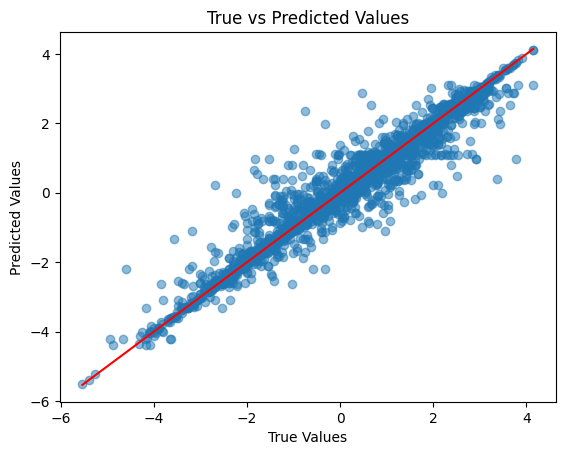

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_val_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Line for perfect prediction
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

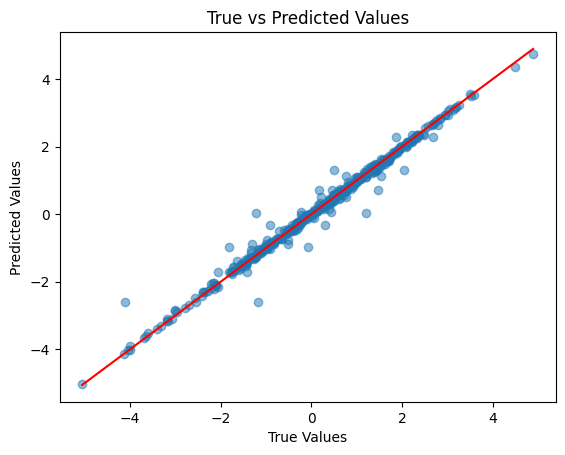

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_val_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_val_pred)
rmse = mean_squared_error(y_test, y_val_pred, squared=False)
mae = mean_absolute_error(y_test, y_val_pred)
r2 = r2_score(y_test, y_val_pred)
result = np.corrcoef(y_test, y_val_pred)[0,1]

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
print(f"Pearson Score: {result}")


MSE: 0.03621350592895533
RMSE: 0.1902984653878095
MAE: 0.08445044259604749
R2 Score: 0.9857906350348192
Pearson Score: 0.9929366324408303


In [10]:
## out of old prediciton
# OOF predictions from base models can be used as features (meta-features) to train a higher-level meta-model. This is a common technique in stacking. Since the OOF predictions are made on unseen data in each fold, the meta-model doesn't get exposed to the original target values, reducing the risk of overfitting.
import xgboost as xgb
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof_nn = np.zeros(X_train.shape[0])
oof_gbm = np.zeros(X_train.shape[0])

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': -1   # Add this line for controlling verbosity
}

for train_index, val_index in kf.split(X_train):
    # Split data into current training and validation sets using .iloc
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train neural network
    model_nn.fit(X_train_fold, y_train_fold, epochs=30, batch_size=32)
    oof_nn[val_index] = model_nn.predict(X_val_fold).reshape(-1,)


    # Train LightGBM
    lgb_train_fold = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_val_fold = lgb.Dataset(X_val_fold, y_val_fold)
    model_gbm_fold = lgb.train(params, lgb_train_fold, num_boost_round=500, valid_sets=[lgb_val_fold])
    oof_gbm[val_index] = model_gbm_fold.predict(X_val_fold)

# Stack the OOF predictions
stacked_oof = np.column_stack((oof_nn, oof_gbm))

# Train meta-model on the OOF predictions
meta_model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
meta_model_xgb.fit(stacked_oof, y_train)

# For final predictions on the test set, first get predictions from base models
nn_preds_test = model_nn.predict(X_test).reshape(-1,)
gbm_preds_test = model_gbm.predict(X_test)
stacked_test_preds = np.column_stack((nn_preds_test, gbm_preds_test))

# Predict using meta-model
final_predictions = meta_model_xgb.predict(stacked_test_preds)


Epoch 1/30
83/83 [==============================] - 0s 6ms/step - loss: 1.3206
Epoch 2/30
83/83 [==============================] - 1s 6ms/step - loss: 1.3005
Epoch 3/30
83/83 [==============================] - 1s 7ms/step - loss: 1.2963
Epoch 4/30
83/83 [==============================] - 1s 6ms/step - loss: 1.3097
Epoch 5/30
83/83 [==============================] - 0s 6ms/step - loss: 1.2614
Epoch 6/30
83/83 [==============================] - 1s 6ms/step - loss: 1.2577
Epoch 7/30
83/83 [==============================] - 1s 6ms/step - loss: 1.2511
Epoch 8/30
83/83 [==============================] - 1s 6ms/step - loss: 1.2298
Epoch 9/30
83/83 [==============================] - 0s 6ms/step - loss: 1.2433
Epoch 10/30
83/83 [==============================] - 0s 5ms/step - loss: 1.2239
Epoch 11/30
83/83 [==============================] - 1s 7ms/step - loss: 1.2526
Epoch 12/30
83/83 [==============================] - 1s 6ms/step - loss: 1.2533
Epoch 13/30
83/83 [==============================

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, final_predictions)
rmse = mean_squared_error(y_test, final_predictions, squared=False)
mae = mean_absolute_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)
result = np.corrcoef(y_test, final_predictions)[0,1]

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
print(f"Pearson Score: {result}")

MSE: 1.034901768567831
RMSE: 1.0173012182081722
MAE: 0.711531979012957
R2 Score: 0.5939278300880183
Pearson Score: 0.7757624962939903
